In [20]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
from tqdm import tqdm
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import time

# Frozen Lake 

### Policy Iteration

In [47]:
#Selecting a large frozen lake for an MDP
size_val=200
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=size_val) ,is_slippery=True, render_mode="rgb_array", negative_reward_hole=False)

### Policy Iteration

In [86]:
#Initializing gamms
gammas=np.arange(0.05,1.05,0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [48]:
#Testing the effect of convergence rate for the same convergence value for frozen lakes
REPEATS=5
convergence_policy_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
times_policy_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
v_policy_iterations=np.zeros(shape=(len(gammas),REPEATS,size_val**2))
pi_policy_iteraetions={}

for big_i,gamma in tqdm(enumerate(gammas)):
    for i in range(REPEATS):
        frozen_lake.reset()
        
        #Solving
        start=time.time()
        V, V_track, pi, convergence_i = Planner(frozen_lake.P).policy_iteration(gamma=gamma,n_iters=10000)
        end=time.time()

        #Storing Time
        times_policy_iterations[big_i,i]=end-start

        #Getting iterations
        convergence_policy_iterations[big_i,i]=convergence_i

        #Storing policy
        pi_policy_iteraetions['{:.2f}_{}'.format(gamma,i)]=pi

        #Stroing ideal V
        v_policy_iterations[big_i,i]=V

20it [8:17:32, 1492.65s/it]


In [80]:
#Testing the effect of convergence rate for the same convergence value for frozen lakes
REPEATS=5
convergence_value_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
times_value_iterations=np.zeros(shape=(gammas.shape[0],REPEATS))
v_value_iterations=np.zeros(shape=(len(gammas),REPEATS,size_val**2))
pi_value_iteraetions={}

for big_i,gamma in tqdm(enumerate(gammas)):
    for i in range(REPEATS):
        frozen_lake.reset()
        
        #Solving
        start=time.time()
        V, V_track, pi, convergence_i = Planner(frozen_lake.P).value_iteration(gamma=gamma,n_iters=100000)
        end=time.time()

        #Storing Time
        times_value_iterations[big_i,i]=end-start

        #Getting iterations
        convergence_value_iterations[big_i,i]=convergence_i

        #Storing policy
        pi_value_iteraetions['{:.2f}_{}'.format(gamma,i)]=pi

        #Stroing ideal V
        v_value_iterations[big_i,i]=V

20it [3:44:54, 674.73s/it] 


In [83]:
#Comparing magnitude of differences between value iteration and policy iteration
print(f'The normalized difference between both policies for all gammas and all runs is {np.linalg.norm(v_policy_iterations-v_value_iterations)} indicating convergence point was the same/similar')

The normalized difference between both policies for all gammas and all runs is 2.5462472713374274e-06 indicating convergence point was the same/similar


In [89]:
convergence_value_iterations.mean(axis=1)

array([8.0000e+00, 1.0000e+01, 1.2000e+01, 1.4000e+01, 1.6000e+01,
       1.8000e+01, 2.0000e+01, 2.3000e+01, 2.6000e+01, 2.9000e+01,
       3.4000e+01, 3.9000e+01, 4.5000e+01, 5.4000e+01, 6.5000e+01,
       8.0000e+01, 1.0500e+02, 1.5200e+02, 2.9000e+02, 1.2724e+04])

Text(0, 0.5, 'Number of Iterations')

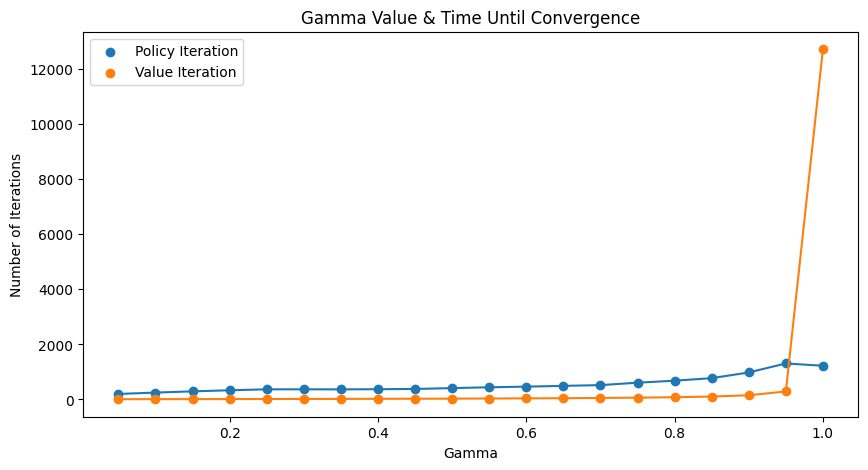

In [101]:
#Plot number of iterations for policy iteration
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Gamma Value & Time Until Convergence')
plt.scatter(gammas,convergence_policy_iterations.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,convergence_value_iterations.mean(axis=1),label='Value Iteration')
plt.plot(gammas,convergence_policy_iterations.mean(axis=1))
plt.plot(gammas,convergence_value_iterations.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Number of Iterations')

Text(0, 0.5, 'Number of Iterations')

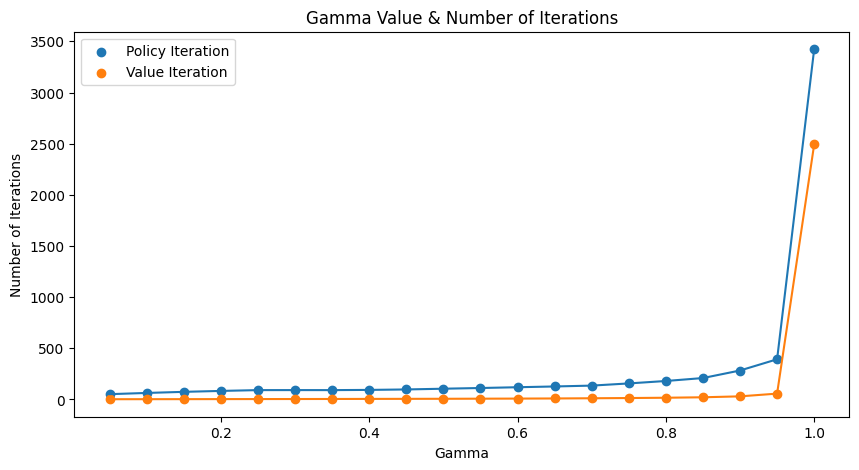

In [98]:
#Plot number Time for Value iteration
fig=plt.figure()
fig.set_size_inches(10,5)
plt.title('Gamma Value & Number of Iterations')
plt.scatter(gammas,times_policy_iterations.mean(axis=1),label='Policy Iteration')
plt.scatter(gammas,times_value_iterations.mean(axis=1),label='Value Iteration')
plt.plot(gammas,times_policy_iterations.mean(axis=1))
plt.plot(gammas,times_value_iterations.mean(axis=1))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Number of Iterations')

### Win Rates

In [191]:
#Sucess Rate for each ideal policy for each gamma policy iteration
attempts=2000
win_rate_policy=np.zeros(shape=(gammas.shape[0],REPEATS))
parent_dict=pi_policy_iteraetions

for ig,gamma in tqdm(enumerate(gammas)):
    for ir,repeat in enumerate(range(REPEATS)):
        key='{:.2f}_{}'.format(gamma,repeat)
        chosen_dict=parent_dict[key]
        won_counter=0
        for i in range(attempts):

            #Resetting the lake
            frozen_lake.reset()
            i=0
            ended=False

            while not ended:
                if i==0:
                    i+=1
                    state,_,ended,won,_=frozen_lake.step(chosen_dict[0])
                else:
                    state,_,ended,won,_=frozen_lake.step(chosen_dict[state])
            won_counter+=float(won)
        win_rate_policy[ig,ir]=won_counter/attempts

20it [02:49,  8.46s/it]


In [192]:
#Sucess Rate for each ideal policy for each gamma value iteration
attempts=2000
win_rate_value=np.zeros(shape=(gammas.shape[0],REPEATS))
parent_dict=pi_value_iteraetions

for ig,gamma in tqdm(enumerate(gammas)):
    for ir,repeat in enumerate(range(REPEATS)):
        key='{:.2f}_{}'.format(gamma,repeat)
        chosen_dict=parent_dict[key]
        won_counter=0
        for i in range(attempts):

            #Resetting the lake
            frozen_lake.reset()
            i=0
            ended=False

            while not ended:
                if i==0:
                    i+=1
                    state,_,ended,won,_=frozen_lake.step(chosen_dict[0])
                else:
                    state,_,ended,won,_=frozen_lake.step(chosen_dict[state])
            won_counter+=float(won)
        win_rate_value[ig,ir]=won_counter/attempts

20it [01:26,  4.32s/it]


In [195]:
win_rate_policy.mean(axis=-1)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.3043, 0.3729, 0.3636,
       0.3598, 0.3479, 0.3485, 0.3573, 0.3541, 0.3645, 0.3706, 0.3885,
       0.4257, 0.4351, 0.4504, 0.7237])

In [196]:
win_rate_value.mean(axis=-1)

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.7215])

: 

### Q Learning

### Visualizing Ideal Policies